
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [43]:
import numpy as np
import pandas as pd
!pip install plotly matplotlib seaborn --quiet
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [7]:
medical_df = pd.read_csv('medical-charges.csv')

In [8]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Можна було б використати дані як деталі конструктору: на суму, яка є стартовою для всіх юзерів додавати/не додавати кошти за певний факт. Наприклад, якщо BMI описує "проблемного" клієнта, то додаємо певну суму до основної. Якщо BMI в нормі, то нічого не додаємо. І так з кожною колонкою поки що без прив'язки до статі, регіону, наявності дітей. Вікова градація - теж вплив на charges.
2. Далі можна розглядати колонку "діти" як +1 до більших витрат через збільшення частоти звернень за мед. допомогою, в порівнянні з бездітними.
3. Можна пошукати кореляції між стовчиками, не виключаємо, що певна кореляція може призвести до вищих мед.витрат.
4. Регіон було б цікаво розглянути з точки зору екології або природних факторів. Наприклад, для людей, що живуть у пром.зонах, вартість вище, адже вони в групі ризику на захворювання через екологічні причини.


**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [16]:
fig = px.histogram(medical_df, x = 'charges', color = 'sex', marginal = 'box', nbins = 50, title = 'Розподіл "Medical charges" за статтю', labels ={'charges': 'Медичні витрати', 'sex': 'Стать'})
fig.show()

In [17]:
fig2 = px.histogram(medical_df, x = 'charges', color = 'region', marginal = 'box', nbins = 50, title = 'Розподіл "Medical charges" за регіоном', labels ={'charges': 'Медичні витрати', 'region': 'Регіон'})
fig2.show()

Cпостереження: З обох графіків видно, що розподіл Medical charges є асиметричним правостороннім розподілом, в якому велика кількість викидів. Такий розподіл говорить, що mean не варто брати для випадків, якщо треба заповнити дані.  Якщо розглядати розподіл за статтю, видно, що медіана у витрат у чоловіків і жінок майже однакова - значить стать не сильно впливає на медіану. Різницю видно на вусах боксплота та по кількості викидів. Можна зробити висновок, що у даному випадку стать впливає на ймовірність велихих витрат. А регіон теж впливає на ймовірність високих витрат. Обидві колонки не є головними факторами підвищення вартості за мед.послуги.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [19]:
fig3 = px.histogram(medical_df, x = 'smoker', color = 'region', marginal = 'box', nbins = 50, title = 'Розподіл "Курців" за регіоном', labels ={'smoker': 'Курці', 'region': 'Регіон'})
fig3.show()

Висновок: К-сть некурців значно перевищує к-сть курців. Дані по регіонам є подібними, тому це знак, що немає міжрегіональних відмінностей по цій ознаці у даному наборі. Ознака 'smoker' не залежить від регіону.

In [20]:
fig4 = px.histogram(medical_df, x = 'smoker', color = 'children', marginal = 'box', nbins = 50, title = 'Розподіл "Курців" за наявністю дітей', labels ={'smoker': 'Курці', 'children': 'діти'})
fig4.show()

Висновок: Дуже помітним є те, що більшість людей не є курцями, не залежно від к-сті дітей. Але немає залежності, що чим більше дітей, тим менше курців. Тому к-сть дітей не підтверджує взаємозв'язок з даними про курців у цьому датасеті.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [22]:
fig5 = px.violin(medical_df, x = 'children', y = 'charges', box = True, points = 'outliers', title = 'Звязок між medical charges та кількістю дітей', labels = {'children': 'К-сть дітей', 'charges': 'витрати'})
fig5.show()

Висновок: Violin plot показує, що медіани medical charges для різної кількості дітей є подібними. Викиди спостерігаються у всіх групах. Може здатися, що для людей з кількістю дітей 5, низькі charges, але даних мало для цієї категорії, щоб робити такий висновок. Тому явної залежності між к-стю дітей та медичними витратами не виявлено.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [23]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [24]:
def estimate_charges(age, w, b):
    return w * age + b

In [25]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

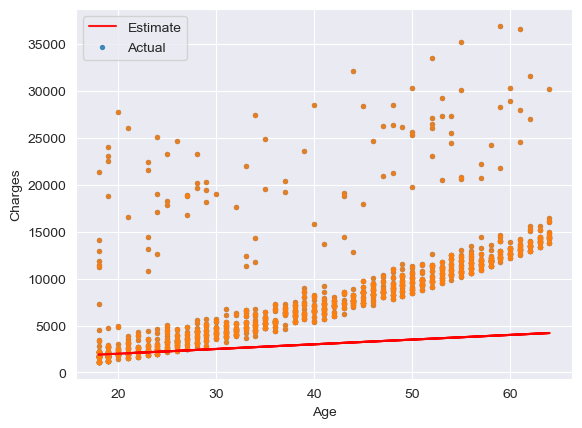

In [27]:
try_parameters(non_smoker_df, w = 50, b = 1000)
plt.show()

Спостереження: при w = 50, b = 1000, лінія проходить так, що не враховує реальних медичних витрат для людей похилого віку. Невдалий варіант.

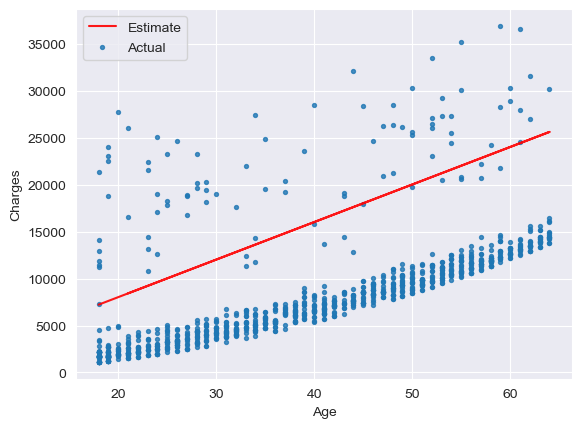

In [32]:
try_parameters(non_smoker_df, w = 400, b = 20)
plt.show()

Спостереження: при w = 400, b = 20 теж невдалий варіант для лінійної моделі, тут зворотня ситуація - значення завищені у порівнянні з фактичними витратами для кожної вікової групи.

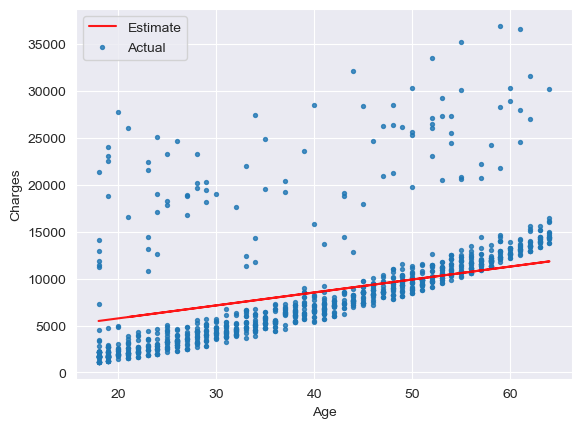

In [40]:
try_parameters(non_smoker_df, w = 138, b = 3000)
plt.show()

Спостереження: при w = 138, b = 3000: тут червона лінія перетинає центр даних - це набагато краще відображає зріст медичних витрат для некурців.Але все одно не ідеально. Видно, що відносно цієї червоної лініїї є значна кількість викидів, тобто є моменти, які не враховує ця модель.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [44]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [48]:
# first pair
w = 50
b = 1000

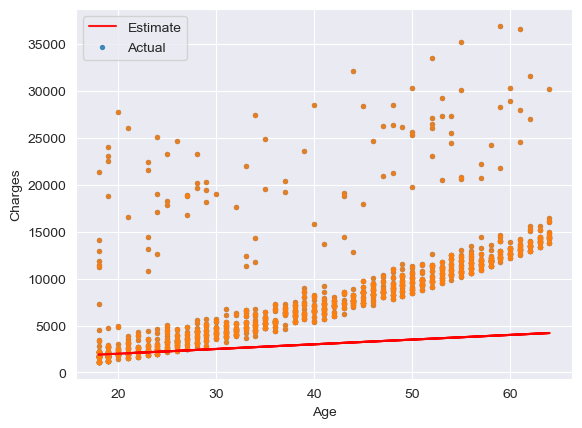

In [51]:
try_parameters(non_smoker_df, w, b)
plt.show()

In [52]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [53]:
rmse(targets, predicted)

7807.534048248412

In [54]:
non_smoker_df.charges.describe()

count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64

Висновок: лінійна модель для першої пари параметрів: w = 50, b = 1000. rmse (7807.534048248412) близько до середнього значення (8434.268297856204), але все одно погано прогнозує конкретні значення і не враховує інші важливі фактори, що мають вплив на medical charges.

In [61]:
# pair number 2 and pair number 3 using cycle
pairs = [(400, 20), (138, 3000)]
ages = non_smoker_df.age
targets = non_smoker_df.charges
for w, b in pairs:
    predictions = estimate_charges(ages, w, b)
    error = rmse(targets, predictions)
    print(f'w = {w}, b = {b}, RMSE = {error:.2f}')

w = 400, b = 20, RMSE = 8894.08
w = 138, b = 3000, RMSE = 5004.92


Висновок: так як графіки вже до всіх пар бачили вище, спробувала через цикл.
У парі w = 400, b = 20 RMSE вище, що говорить про переоцінку medical charges для всіх, а особливо для літніх людей.
У парі w = 138, b = 3000, RMSE є меншим, що свідчить про кращий зв'язок з представленими даними. Але все одно це не ідеальне рішення. Є фактори, котрі не були враховані при побудові моделі.
